In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
url = 'https://raw.githubusercontent.com/alec-carawan/datasets/main/D3.csv'

df = pd.read_csv(url)

x1 = df.values[:, 0]  # get input values from first column   -- X1 is the list here
x2 = df.values[:, 1]  # get input values from second column  -- X2 is the list here
x3 = df.values[:, 2]  # get input values from third column   -- X3 is the list here
y  = df.values[:, 3]  # get output values from fourth column -- Y  is the list here
m = len(y)  # Number of training examples
n1 = len(x1)  # Number of training examples
n2 = len(x2)  # Number of training examples
n3 = len(x3)  # Number of training examples

In [95]:
#Instantiate intermediate variables
x1_0 = np.ones((m, 1))
x1_1 = x1.reshape(m, 1)

x2_0 = np.ones((m, 1))
x2_1 = x2.reshape(m, 1)

x3_0 = np.ones((m, 1))
x3_1 = x3.reshape(m, 1)

x1 = np.hstack((x1_0, x1_1))
x2 = np.hstack((x2_0, x2_1))
x3 = np.hstack((x3_0, x3_1))

theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)

In [96]:
def compute_cost_3var(X1, X2, X3, y, theta1, theta2, theta3):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X1.dot(theta1) + X2.dot(theta2) + X3.dot(theta3)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [97]:
def gradient_descent_3var(X1, X2, X3, y, theta1, theta2, theta3, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions_x1 = X1.dot(theta1)
        predictions_x2 = X2.dot(theta2)
        predictions_x3 = X3.dot(theta3)

        errors_x1 = np.subtract(predictions_x1, y)
        errors_x2 = np.subtract(predictions_x2, y)
        errors_x3 = np.subtract(predictions_x3, y)

        sum_delta_x1 = (alpha / m) * X1.transpose().dot(errors_x1)
        sum_delta_x2 = (alpha / m) * X2.transpose().dot(errors_x2)
        sum_delta_x3 = (alpha / m) * X3.transpose().dot(errors_x3)

        theta1 -= sum_delta_x1
        theta2 -= sum_delta_x2
        theta3 -= sum_delta_x3

        cost_history[i] = compute_cost_3var(X1, X2, X3, y, theta1, theta2, theta3)

    return theta1, theta2, theta3, cost_history

In [98]:
iterations = 1100
alpha = 0.0001

In [99]:
theta1, theta2, theta3, cost_history = gradient_descent_3var(x1, x2, x3, y, theta1, theta2, theta3, alpha, iterations)
print('Final value of theta1 =', theta1)
print('Final value of theta2 =', theta2)
print('Final value of theta3 =', theta3)
print('cost_history_x1 =', cost_history)

Final value of theta1 = [0.18518529 0.05995199]
Final value of theta2 = [0.15096166 0.35575596]
Final value of theta3 = [0.16614176 0.23001351]
cost_history_x1 = [5.520477   5.51652308 5.51257668 ... 3.99134075 3.991407   3.99147454]


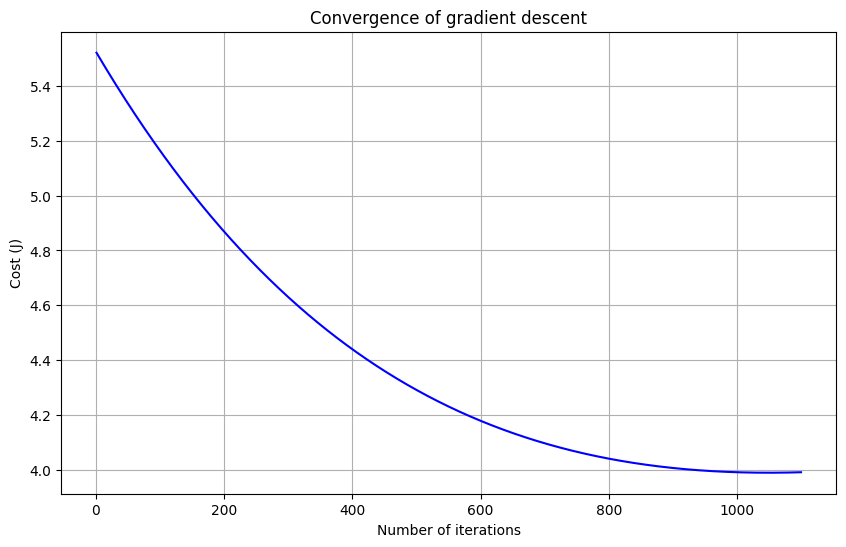

In [100]:
#Plot Convergence of gradient descent
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [103]:
#predict y value for new X1, X2, and X3
x1 = ([1,1,1])
x2 = ([2,0,4])
x3 = ([3,2,1])

prediction1 = theta1 + theta2 + theta3
prediction2 = 2*theta1  + 4*theta3
prediction3 = 3*theta1 + 2*theta2 + theta3
print('Prediction for new values:\n', prediction1, '\n', prediction2, '\n', prediction3)

Prediction for new values:
 [0.5022887  0.64572147] 
 [1.03493762 1.03995803] 
 [1.02362093 1.12138141]
